# Tratado de exploración Jupyter I

## 1. Preparar los motores

- ¡Importar importar que el mundo se va a acabar!

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import time
import pickle
from __future__ import division
import csv

- Definición de funciones auxiliares

In [3]:
# Cargar diccionario de estaciones de metro
dict_metro = {}
with open('/home/cata/Documentos/Datois/Diccionario-EstacionesMetro.csv',mode='r') as infile:
    reader = csv.reader(infile,delimiter=';')
    dict_metro = {rows[5]:rows[7] for rows in reader}

In [4]:
# Función que estandariza los valores de los paraderos de subida y bajada
def update_vals(row, data=dict_metro):    
    if row.par_subida in data:
        row.par_subida = data[row.par_subida]
    if row.par_bajada in data:
        row.par_bajada = data[row.par_bajada]
    return row


In [5]:
# Función que busca los indices de los valores en la matriz que coinciden con argumento
def quienCalzaCon(iden_matris,argumento):
    i = 0
    identified_indexs = []
    limit = 5168
    while (i<limit):
        the_index = np.argmax(iden_matrix[:,i])
        if(the_index==argumento):
            identified_indexs.append(i)
        i += 1
    return identified_indexs
    

In [17]:
def queryToCSV(matrix, user_id, str_diff = ''):
    query = 'id ==' + str(user_id)
    df_query = frame.query(query)
    file_path =  '/home/cata/Documentos/sequences/' + str(user_id) + '_' + str_diff + '.csv'
    df_query.to_csv(path_or_buf=file_path)

- Leer hace bien 

In [7]:
#frame = pd.read_csv('/home/cata/Documentos/Datois/etapas100000_abril.csv')
frame = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_abril_allyearsids_10_100000.csv')
frame.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
0,2013-04-21 19:55:16,1132106,346723,6299454,BUS,T203 00I,DOMINGO,13,2,348100,6289103,2013-04-21 20:24:17,E-20-199-NS-2,T-24-205-NS-20,307,348,0
1,2013-04-21 19:35:52,1132106,351378,6302574,BUS,T502 00R,DOMINGO,13,1,346761,6299570,2013-04-21 19:49:12,T-15-135-OP-110,T-4-19-NS-100,188,55,0
2,2013-04-21 07:12:35,1132106,346722,6299393,BUS,T502 00I,DOMINGO,12,2,351366,6302551,2013-04-21 07:26:43,E-20-289-PO-5,T-15-135-PO-5,266,188,0
3,2013-04-21 06:42:07,1132106,348110,6289140,BUS,T203 00R,DOMINGO,12,1,346813,6299398,2013-04-21 07:04:18,T-22-205-SN-65,E-20-190-SN-40,328,307,0
4,2013-04-19 07:25:09,1132106,346717,6299455,BUS,T203 00I,LABORAL,11,2,NaN,NaN,NaN,E-20-199-NS-2,NaN,307,NaN,NaN


In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
tiempo_subida              100000 non-null object
id                         100000 non-null int64
x_subida                   99224 non-null float64
y_subida                   99224 non-null float64
tipo_transporte            100000 non-null object
serviciosentidovariante    98074 non-null object
tipo_dia                   100000 non-null object
nviaje                     100000 non-null int64
netapa                     100000 non-null int64
x_bajada                   86774 non-null float64
y_bajada                   86774 non-null float64
tiempo_bajada              86774 non-null object
par_subida                 99195 non-null object
par_bajada                 86767 non-null object
zona_subida                99180 non-null float64
zona_bajada                86764 non-null float64
adulto                     86774 non-null float64
dtypes: float64(7), int64(3), object(7)
memory 

- Paso los tiempos de string a timestamp para luego calcular la diferencia entre una transacción y otra

In [9]:
frame['tiempo_subida'] = pd.to_datetime(frame.tiempo_subida)
frame = frame.sort_values(by=['id', 'tiempo_subida'])

In [10]:
frame['diferencia_tiempo'] = (frame['tiempo_subida']-frame['tiempo_subida'].shift()).fillna(0)

In [11]:
frame.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto,diferencia_tiempo
23,2013-04-14 06:45:44,1132106,348108,6289153,BUS,T203 00R,DOMINGO,1,1,346818,6299394,2013-04-14 07:07:02,T-22-205-SN-65,E-20-190-SN-40,328,307,0,0 days 00:00:00
22,2013-04-14 07:51:52,1132106,346751,6299389,BUS,T502 00I,DOMINGO,2,1,351363,6302549,2013-04-14 08:04:11,E-20-291-PO-20,T-15-135-PO-5,307,188,0,0 days 01:06:08
21,2013-04-14 19:56:47,1132106,351368,6302559,BUS,T502 00R,DOMINGO,3,1,346763,6299568,2013-04-14 20:09:11,T-15-135-OP-110,T-4-19-NS-100,188,55,0,0 days 12:04:55
20,2013-04-14 20:15:25,1132106,346713,6299427,BUS,T203 00I,DOMINGO,3,2,348095,6289148,2013-04-14 20:40:51,E-20-199-NS-2,T-24-205-NS-20,307,348,0,0 days 00:18:38
19,2013-04-15 21:04:59,1132106,348103,6289191,BUS,T206 00R,LABORAL,4,1,346844,6299320,2013-04-15 21:33:23,T-22-205-SN-65,T-20-190-SN-35,328,309,0,1 days 00:49:34


- Elimino las columnas que no usaré (cuidado, correr solo una vez :)

In [12]:
frame.drop(frame.columns[[2,3,4,5,9,10,11,14,15,16]], axis=1, inplace=True)
frame.head()

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada,diferencia_tiempo
23,2013-04-14 06:45:44,1132106,DOMINGO,1,1,T-22-205-SN-65,E-20-190-SN-40,0 days 00:00:00
22,2013-04-14 07:51:52,1132106,DOMINGO,2,1,E-20-291-PO-20,T-15-135-PO-5,0 days 01:06:08
21,2013-04-14 19:56:47,1132106,DOMINGO,3,1,T-15-135-OP-110,T-4-19-NS-100,0 days 12:04:55
20,2013-04-14 20:15:25,1132106,DOMINGO,3,2,E-20-199-NS-2,T-24-205-NS-20,0 days 00:18:38
19,2013-04-15 21:04:59,1132106,LABORAL,4,1,T-22-205-SN-65,T-20-190-SN-35,1 days 00:49:34


- Falta estandarizar estaciones de metro con dos nombres

In [13]:
frame.apply(update_vals, axis=1)
frame.head()

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada,diferencia_tiempo
23,2013-04-14 06:45:44,1132106,DOMINGO,1,1,T-22-205-SN-65,E-20-190-SN-40,0 days 00:00:00
22,2013-04-14 07:51:52,1132106,DOMINGO,2,1,E-20-291-PO-20,T-15-135-PO-5,0 days 01:06:08
21,2013-04-14 19:56:47,1132106,DOMINGO,3,1,T-15-135-OP-110,T-4-19-NS-100,0 days 12:04:55
20,2013-04-14 20:15:25,1132106,DOMINGO,3,2,E-20-199-NS-2,T-24-205-NS-20,0 days 00:18:38
19,2013-04-15 21:04:59,1132106,LABORAL,4,1,T-22-205-SN-65,T-20-190-SN-35,1 days 00:49:34


In [14]:
frame.query('id ==24547373')

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada,diferencia_tiempo
15547,2013-04-15 08:40:05,24547373,LABORAL,1,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,-6 days +15:29:15
15546,2013-04-15 13:21:49,24547373,LABORAL,2,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 04:41:44
15545,2013-04-15 14:40:58,24547373,LABORAL,3,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,0 days 01:19:09
15544,2013-04-15 19:05:37,24547373,LABORAL,4,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 04:24:39
15543,2013-04-16 08:41:59,24547373,LABORAL,5,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,0 days 13:36:22
15542,2013-04-16 20:08:27,24547373,LABORAL,6,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 11:26:28
15541,2013-04-17 08:31:43,24547373,LABORAL,7,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,0 days 12:23:16
15540,2013-04-17 12:48:11,24547373,LABORAL,8,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 04:16:28
15539,2013-04-17 14:46:06,24547373,LABORAL,9,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,0 days 01:57:55
15538,2013-04-17 20:18:04,24547373,LABORAL,10,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 05:31:58


In [18]:
queryToCSV(frame,24547373)

- Explorar los periodos de tiempo en distintas locaciones

In [11]:
## TODO

## 2. Crear perfiles de usuarios con las locaciones mínimas y la matriz TPM

In [18]:
tpm = [] # Transition Probability Matrix (TPM)
mls = [] # minimum location set (mlt)
nvisitas = [] # diccionario contador de visitas a cada locación
profile = {} # diccionario con tpm y mls para cada usuario
users_profiles= [] # arreglo de diccionarios
nlocations = [] # arreglo con el numero de locaciones por cada usuario
last_id = 0
last_stop = ""
last_stop_index = 0
counter = 0
matrix_size = 30 # maximo numero de posiciones admitidas por usuario

In [19]:
for transaction in zip(frame['id'], frame['par_subida'], frame['par_bajada']):
    counter +=1
    user_id = transaction[0]
    par_subida = transaction[1]
    par_bajada = transaction[2]
    # no se pierde el paradero de bajada, porque cuando no hay subida no se puede estimar la bajada
    if (par_subida!=par_subida):
        continue        
    if (user_id!=last_id):
        # si ya paso una vuelta, agregar TPM y minimum location set a users_profiles
        if(counter>1):
            n_locations = len(mls)
            nlocations.append(n_locations)
            tpm = tpm[0:n_locations,0:n_locations]
            tpm = tpm/tpm.sum(axis=1)[:,None]
            profile = {'user_id':last_id,'mls':mls,'tpm':tpm,'nvisitas':nvisitas}
            users_profiles.append(profile)
        # construir nueva TPM y mls no vacia para que no se caiga
        last_id = user_id
        tpm = np.zeros((matrix_size,matrix_size))
        mls = [par_subida]
        last_stop = par_subida
        last_stop_index = 0
        nvisitas = [0]
        counter = 1
    # buscar si la locación ya había sido visitada 
    try:
        index_subida = mls.index(par_subida)
    except ValueError:
        index_subida = -1
    # si la subida no había sido visitada se debe agregar al mls
    if (index_subida < 0):
        if(len(mls)<matrix_size-1):
            mls.append(par_subida)
            nvisitas.append(1)
            index_subida = len(mls) - 1
            if(par_subida!=last_stop):
                tpm[last_stop_index,index_subida] +=1
            # si la bajada no se pudo calcular solo se considera la subida y 
            # se deja para calcular tpm en la proxima ronda 
            if (par_bajada!=par_bajada):
                last_stop = par_subida
                last_stop_index = index_subida
            else:
                try:
                    index_bajada = mls.index(par_bajada)
                except ValueError:
                    index_bajada = -1
                # si la bajada no se había visitado antes, agregar bajada y sumar nvisitas 
                if (index_bajada < 0):
                    mls.append(par_bajada)
                    nvisitas.append(1)
                    index_bajada = len(mls) - 1
                    tpm[index_subida,index_bajada] +=1
                # sumar nvisita 
                else:
                    if(index_subida!=index_bajada):
                        nvisitas[index_bajada] = nvisitas[index_bajada]+1
                        tpm[index_subida,index_bajada] +=1
                last_stop = par_bajada
                last_stop_index = index_bajada
    else:
        nvisitas[index_subida] = nvisitas[index_subida]+1
        if(par_subida!=last_stop):
                tpm[last_stop_index,index_subida] +=1
        # subida estaba de antes y no hay bajada
        # REVISAR SI ESTO NO ES REDUNDANTE!
        if (par_bajada!=par_bajada):
            last_stop = par_subida
            last_stop_index = index_subida
        # hay subida y bajada
        else:
            try:
                index_bajada = mls.index(par_bajada)
            except ValueError:
                index_bajada = -1
            # hay bajada pero no estaba antes
            if (index_bajada<0):
                if(len(mls)<matrix_size-1):
                    mls.append(par_bajada)
                    last_stop = par_bajada
                    nvisitas.append(1)
                    index_bajada = len(mls) - 1
                    last_stop_index = index_bajada
                    tpm[index_subida,index_bajada] +=1
                else:
                    last_stop = par_subida
                    last_stop_index = index_subida
            # subida y bajada estaban de antes
            else:
                if(index_bajada!=index_subida):
                    nvisitas[index_bajada] = nvisitas[index_bajada]+1
                    tpm[index_subida,index_bajada] +=1

- Ejemplo de perfil de usuario

In [20]:
users_profiles[0]

{'mls': ['T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-20-190-SN-35',
  'E-20-289-PO-5',
  'T-22-205-SN-55',
  'T-24-205-NS-30',
  'T-15-135-OP-105'],
 'nvisitas': [5, 5, 4, 6, 5, 6, 6, 4, 1, 2, 1, 1, 1],
 'tpm': array([[ 0.        ,  0.8       ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.2       ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.125     ,  0.        ,  0.375     ,  0.        ,  0.25      ,
          0.        ,  0.25      ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.5       ,
        

## 3. Explorar los perfiles de usuario

- Cuantos usuarios habrá en esta muestra?

In [21]:
numero_usuarios = len(users_profiles)
numero_usuarios

5168

- Cuantas locaciones habrá por usuario?

(array([  74.,   88.,  109.,  143.,  141.,  196.,  263.,  241.,  284.,
         307.,  296.,  326.,  271.,  258.,  273.,  218.,  202.,  191.,
         187.,  141.,  138.,  119.,  122.,   81.,   86.,   57.,   67.,  289.]),
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 28 Patch objects>)

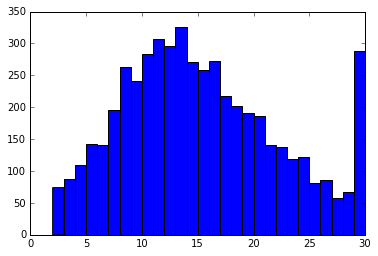

In [22]:
plt.hist(nlocations,28)

## 4. Preparar el periodo de identificación

- Leer hace bien 

In [29]:
df_id_period = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_septiembre_allyearsids_10_100000.csv')
df_id_period.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
0,2013-09-29 19:58:57,1132106,346742,6299422,BUS,T206 00I,DOMINGO,16,2,348092,6289202,2013-09-29 20:30:10,E-20-199-NS-2,T-24-205-NS-20,307,348,0
1,2013-09-29 19:38:31,1132106,351400,6302597,BUS,T502 00R,DOMINGO,16,1,346731,6299466,2013-09-29 19:54:38,T-15-135-OP-110,T-4-19-NS-100,188,55,0
2,2013-09-29 07:49:32,1132106,346768,6299380,BUS,T502 00I,DOMINGO,15,1,351370,6302561,2013-09-29 08:04:30,E-20-291-PO-20,T-15-135-PO-5,307,188,0
3,2013-09-29 06:48:11,1132106,348107,6289130,BUS,T206 00R,DOMINGO,14,1,346852,6299355,2013-09-29 07:10:26,T-22-205-SN-65,T-20-190-SN-35,328,309,0
4,2013-09-28 07:32:43,1132106,346729,6299435,BUS,T206 00I,SABADO,13,2,348099,6289122,2013-09-28 07:54:57,E-20-199-NS-2,T-24-205-NS-20,307,348,0


Reflexion: Debiese utilizar por ahora solo las columnas que me sirven, sino el todos contra todos será muy dificil

- Elimino las columnas que no usaré (cuidado, correr solo una vez :)

In [24]:
df_id_period.drop(df_id_period.columns[[2,3,4,5,9,10,11,14,15,16]], axis=1, inplace=True)
df_id_period.head()

,id,serviciosentidovariante,par_subida,par_bajada
0,1132106,T206 00I,E-20-199-NS-2,T-24-205-NS-20
1,1132106,T502 00R,T-15-135-OP-110,T-4-19-NS-100
2,1132106,T502 00I,E-20-291-PO-20,T-15-135-PO-5
3,1132106,T206 00R,T-22-205-SN-65,T-20-190-SN-35
4,1132106,T206 00I,E-20-199-NS-2,T-24-205-NS-20


- Estandarizo los paraderos de subida y bajada

In [25]:
df_id_period.apply(update_vals, axis=1)
df_id_period.head()

,id,serviciosentidovariante,par_subida,par_bajada
0,1132106,T206 00I,E-20-199-NS-2,T-24-205-NS-20
1,1132106,T502 00R,T-15-135-OP-110,T-4-19-NS-100
2,1132106,T502 00I,E-20-291-PO-20,T-15-135-PO-5
3,1132106,T206 00R,T-22-205-SN-65,T-20-190-SN-35
4,1132106,T206 00I,E-20-199-NS-2,T-24-205-NS-20


## 5. Extraer secuencias y locaciones principales del periodo de identificación

Debo extraer la secuencia de posiciones de las transacciones, y el arreglo de locaciones mas visitadas

In [26]:
tpm = [] # Transition Probability Matrix (TPM)
mls = [] # minimum location set (mlt)
nvisitas = [] # diccionario contador de visitas a cada locación
profile = {} # diccionario con tpm y mls para cada usuario
profiles = [] # arreglo de diccionarios
last_id = 0
last_stop = ""
last_stop_index = 0
counter = 0
n_locations = []

In [27]:
for transaction in zip(df_id_period['id'], df_id_period['par_subida'], df_id_period['par_bajada']):
    counter +=1
    id_user = transaction[0]
    par_subida = transaction[1]
    par_bajada = transaction[2]
    if (par_subida!=par_subida):
        continue        
    if (id_user!=last_id):
        # si ya paso una vuelta, agregar TPM y minimum location set a users_profiles
        if(counter>1):
            n_locations.append(len(mls))
            profile = {'user_id':last_id,'sequence':sequence,'mls':mls,'nvisitas':nvisitas}
            profiles.append(profile)
        last_id = id_user
        # construir mls no vacia para que no se caiga 
        mls = [par_subida]
        sequence = [par_subida]
        last_stop = par_subida
        nvisitas = [0]
        counter = 1
    # buscar si la locación ya había sido visitada 
    try:
        index_subida = mls.index(par_subida)
    except ValueError:
        index_subida = -1
    # si la subida no había sido visitada se debe agregar al mls
    if (index_subida < 0):
        mls.append(par_subida)
        nvisitas.append(1)
        index_subida = len(mls) - 1
        sequence.append(par_subida)
        # si la bajada no se pudo calcular solo se considera la subida y se deja para calcular tpm en la proxima ronda 
        if (par_bajada!=par_bajada):
            last_stop = par_subida
            #print "Iteración n°: " + str(counter) + " , no se pudo estimar la bajada"
        else:
            last_stop = par_bajada
            sequence.append(par_bajada)
            try:
                index_bajada = mls.index(par_bajada)
            except ValueError:
                index_bajada = -1
            # si la bajada no se había visitado antes, agregar bajada y sumar nvisitas 
            if (index_bajada < 0):
                mls.append(par_bajada)
                index_bajada = len(mls)-1
                nvisitas.append(1)
            # sumar nvisita 
            else:
                nvisitas[index_bajada] = nvisitas[index_bajada]+1
    else:
        nvisitas[index_subida] = nvisitas[index_subida]+1
        if(par_subida!=last_stop):
            sequence.append(par_subida)
        # subida estaba de antes y no hay bajada
        # REVISAR SI ESTO NO ES REDUNDANTE!
        if (par_bajada!=par_bajada):
            last_stop = par_subida
        # hay subida y bajada
        else:
            sequence.append(par_bajada)
            last_stop = par_bajada
            try:
                index_bajada = mls.index(par_bajada)
            except ValueError:
                index_bajada = -1
            # hay bajada pero no estaba antes
            if (index_bajada<0):
                mls.append(par_bajada)
                index_bajada = len(mls) - 1
                nvisitas.append(1)
            # subida y bajada estaban de antes
            else:
                nvisitas[index_bajada] = nvisitas[index_bajada]+1


- Por ej. la secuencia 2 es un diccionario con las locaciones minimas, las visitas a esas locaciones, la secuencia y el id del usuario

In [28]:
# Por ej. el perfil 0 es un diccionario con las locaciones minimas, 
# las visitas a esas locaciones, la secuencia y el id del usuario
profiles[0]

{'mls': ['E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-22-205-SN-65',
  'T-20-190-SN-35',
  'E-20-190-SN-40',
  'T-14-131-PO-40',
  'T-14-121-OP-10',
  'E-20-289-PO-5',
  'T-22-205-SN-55',
  'L-24-26-OP-25'],
 'nvisitas': [6, 6, 7, 6, 5, 7, 5, 1, 5, 1, 1, 1, 1, 1],
 'sequence': ['E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-22-205-SN-65',
  'T-20-190-SN-35',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'T-14-131-PO-40',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-14-121-OP-10',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-291-PO

- Se puede observar que el largo de la secuencia es mayor al de las locaciones minimas

In [82]:
len(profiles[0]['sequence'])

53

In [83]:
len(profiles[0]['mls'])

14

- El número total de perfiles de secuencia extraidos es:

In [84]:
n_users = len(profiles)
n_users

5343

## 6. Todos contra todos

- Primero encuentro el minimo entre el numero de tpms y las secuencias, para que la matriz sea cuadrada

In [85]:
limit = np.min((n_users,numero_usuarios))
limit

5168

- Luego comparo todas las tpms contra todas las secuencias

In [86]:
tpm = []
index_correct = []
p_zero = pow(10,-8)
p_nan = pow(10,-8)
idenk = 0
iden = np.zeros((limit,limit))
i = 0
j = 0

In [26]:
# asume que son los mismos ids o que se saben de antemano
start_time = time.time()
for profile in users_profiles:
    tpm = profile['tpm']
    id_user = profile['user_id']
    mls = profile['mls']
    for sequence in profiles:
        travel_counter = 0
        #calcular idenk
        for travel in sequence['sequence']:
            # buscar pik en tpm
            try:
                index_bajada = mls.index(travel)
            except ValueError:
                index_bajada = -1
            if(travel_counter > 0):
                if(index_bajada < 0 or index_subida < 0):
                    pik = p_nan
                else:
                    pik = tpm[index_subida, index_bajada]
                if(pik != pik):
                    pik = p_nan
                elif(pik == 0):
                    pik = p_zero
                # sumar log10
                idenk += np.log10(pik)
            index_subida = index_bajada
            travel_counter +=1

        iden[i,j] = idenk
        j+=1
        if(id_user == sequence['user_id']):
            index_correct.append(idenk)
        idenk = 0
        if(j >= limit):
            break
    i += 1
    j = 0
    if(i >= limit):
        break
delta_time = time.time() - start_time

- Guardar resultados

In [ ]:
with open('objs_6.pickle', 'w') as f:
    pickle.dump([iden, index_correct, delta_time], f)

In [26]:
with open('objs_5.pickle') as f:
    iden, index_correct, delta_time = pickle.load(f)

## 7. Análisis de resultados

- Los indices correctos están en la diagonal, y a pesar de que las secuencias son de distinto largo se logra identificar la correcta

In [38]:
iden_matrix = np.matrix(iden)
df_ident = pd.DataFrame(iden_matrix)
df_ident.head()

,0,1,2,3,4,5,6,7,8,9,...,5158,5159,5160,5161,5162,5163,5164,5165,5166,5167
0,-189.60206,-248,-264.000000,-208.00000,-152.00000,-272,-184,-256,-248,-408,...,-200,-368,-248,-392,-392,-392,-432,-424,-168,-80
1,-416.00000,-164,-264.000000,-208.00000,-152.00000,-272,-184,-256,-248,-408,...,-200,-368,-248,-392,-392,-392,-432,-424,-168,-80
2,-416.00000,-248,-185.982271,-208.00000,-152.00000,-272,-184,-256,-248,-408,...,-200,-368,-248,-392,-392,-392,-432,-424,-168,-80
3,-416.00000,-248,-264.000000,-89.50515,-152.00000,-272,-184,-256,-248,-408,...,-200,-368,-248,-392,-392,-392,-432,-424,-168,-80
4,-416.00000,-248,-264.000000,-208.00000,-80.20412,-272,-184,-256,-248,-408,...,-200,-368,-248,-392,-392,-392,-432,-424,-168,-80


- Porcentaje de identificaciones correctas

In [31]:
i = 0
identified_indexs = []
wrong_indexs = []
correct_indexs = []
selected_indexs = []
n_identified = 0
limit = 5168
while (i<limit):
    the_index = np.argmax(iden_matrix[:,i])
    selected_indexs.append(np.max(iden_matrix[:,i]))
    identified_indexs.append(the_index)
    if(the_index!=i):
        wrong_indexs.append(the_index)
    else:
        correct_indexs.append(the_index)
        n_identified += 1
    i += 1


In [32]:
porcentaje_correcto = n_identified*100/limit
print str(round(porcentaje_correcto,2))+ "%"

66.93%


In [33]:
len(correct_indexs)

3459

Histograma de los indices seleccionados como correctos, y los indices de los correctamente seleccionados

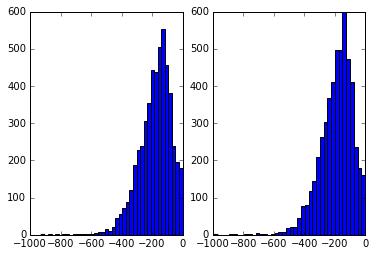

In [37]:
fig, axs = plt.subplots(1,2)
plt.subplot(121)
plt.hist(selected_indexs,40)
plt.subplot(122)
plt.hist(index_correct,40)
plt.show()

- Se observa redundancia en los incorrectamente identificados, probablemente causado por usuarios que viajan mucho

In [39]:
x = np.array(identified_indexs)
y = np.bincount(x)
ii = np.nonzero(y)[0]

In [40]:
frequency_correct = zip(ii,y[ii]) 

In [41]:
counter = 0
ncounter = 0
freq_max_1 = 0
freq_max_2 = 0
freq_max_3 = 0
for element in frequency_correct:
    if(element[1]>1):
        counter +=1
        ncounter += element[1]
    

- Cuantos ids se asignan a más de un usuario

In [42]:
counter

1012

- A cuantos usuarios?

In [43]:
ncounter

2328

- Si quito estos ids, cual es el porcentaje de identificación?

In [44]:
x = limit-1-ncounter

In [45]:
(n_identified-counter)/x*100

86.192321239873195

- Falta analizar los casos en que el indice correcto es muy bajo

In [28]:
# TODO

- Falta ver quienes son los que se mal identifican 

In [36]:
# TODO

- Falta ver quienes son los que se identifican con muchos y si son las mismas personas (compatibilidad)

In [37]:
# TODO

- Debiese alargar la secuencia si es que es menor que las locaciones de la tpm?<br/>
    pensar en casos de borde

In [38]:
# TODO

- Ordenar ids más usados

In [39]:
frequency_correct.sort(key = lambda t: t[1], reverse=True)
frequency_correct

[(0, 11),
 (1056, 5),
 (1067, 5),
 (1278, 5),
 (1954, 5),
 (2234, 5),
 (2670, 5),
 (2809, 5),
 (3150, 5),
 (3698, 5),
 (3906, 5),
 (4296, 5),
 (4392, 5),
 (5030, 5),
 (5048, 5),
 (31, 4),
 (133, 4),
 (203, 4),
 (232, 4),
 (498, 4),
 (583, 4),
 (586, 4),
 (651, 4),
 (673, 4),
 (697, 4),
 (851, 4),
 (980, 4),
 (987, 4),
 (1017, 4),
 (1058, 4),
 (1146, 4),
 (1164, 4),
 (1189, 4),
 (1250, 4),
 (1376, 4),
 (1415, 4),
 (1441, 4),
 (1444, 4),
 (1647, 4),
 (1829, 4),
 (2626, 4),
 (2860, 4),
 (3237, 4),
 (3256, 4),
 (3348, 4),
 (3466, 4),
 (3654, 4),
 (4080, 4),
 (4106, 4),
 (4900, 4),
 (4, 3),
 (11, 3),
 (34, 3),
 (50, 3),
 (72, 3),
 (74, 3),
 (105, 3),
 (117, 3),
 (161, 3),
 (178, 3),
 (205, 3),
 (222, 3),
 (239, 3),
 (245, 3),
 (256, 3),
 (276, 3),
 (277, 3),
 (279, 3),
 (295, 3),
 (311, 3),
 (318, 3),
 (331, 3),
 (361, 3),
 (368, 3),
 (389, 3),
 (394, 3),
 (410, 3),
 (431, 3),
 (437, 3),
 (441, 3),
 (485, 3),
 (508, 3),
 (532, 3),
 (541, 3),
 (563, 3),
 (579, 3),
 (585, 3),
 (602, 3),
 (603

## 8. Análisis por casos

- Uno correcto (pero que calza con muchos)

In [46]:
profiles[0]['sequence']
users_profiles[0]

NameError: name 'profiles' is not defined

In [47]:
up_matrix = np.matrix(users_profiles[0]["tpm"])
df_up_matrix = pd.DataFrame(up_matrix)
df_up_matrix.columns = users_profiles[0]["mls"]
df_up_matrix.index = users_profiles[0]["mls"]
df_up_matrix

NameError: name 'users_profiles' is not defined

In [105]:
matchers0 = quienCalzaCon(iden_matrix,0)
matchers0

[0, 156, 305, 550, 667, 2168, 2449, 3696, 4128, 4771, 4793]

In [ ]:
iden_matrix[]

In [106]:
profiles[156]

{'mls': ['T-1-3-SN-1',
  'T-6-45-OP-50',
  'L-6-27-PO-50',
  'T-1-3-NS-55',
  'I-4-12-PO-11',
  'L-6-44-NS-20',
  'CERRO BLANCO',
  'VESPUCIO NORTE',
  'L-6-27-PO-60',
  'T-1-3-NS-60',
  'T-1-3-SN-12',
  'T-1-3-SN-17',
  'T-1-3-SN-3'],
 'nvisitas': [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1],
 'sequence': ['T-1-3-SN-1',
  'T-6-45-OP-50',
  'L-6-27-PO-50',
  'T-1-3-NS-55',
  'I-4-12-PO-11',
  'L-6-44-NS-20',
  'CERRO BLANCO',
  'VESPUCIO NORTE',
  'L-6-27-PO-60',
  'T-1-3-NS-60',
  'T-1-3-SN-12',
  'T-1-3-SN-17',
  'T-1-3-SN-12',
  'T-1-3-SN-17',
  'T-1-3-SN-12',
  'T-1-3-SN-17',
  'T-1-3-SN-1',
  'T-1-3-SN-3'],
 'user_id': 18671610}

In [108]:
users_profiles[156]

{'mls': ['L-6-47-SN-5',
  'L-6-43-NS-20',
  'L-6-43-SN-20',
  'T-20-188-NS-11',
  'SANTA ANA L2',
  'PLAZA DE ARMAS',
  'E-14-134-SN-30',
  'L-6-44-NS-10',
  'L-6-44-SN-15',
  'T-6-45-PO-30',
  'T-6-45-PO-25',
  'E-20-174-NS-10',
  'E-20-291-PO-10',
  'L-6-27-OP-65',
  'L-6-27-PO-60',
  'L-6-27-PO-50',
  'T-6-41-SN-15'],
 'nvisitas': [1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 3, 6, 6, 1, 1, 1, 1],
 'tpm': array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.  

- Uno incorrecto por cambio de comportamiento

In [94]:
np.argmax(iden_matrix[:,5])
iden_matrix[1187,5]

-224.99672038623589

In [90]:
iden_matrix[5,5]

-272.0

(array([  5.04100000e+03,   9.00000000e+01,   1.00000000e+00,
          2.20000000e+01,   8.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([-272.        , -267.29967204, -262.59934408, -257.89901612,
        -253.19868815, -248.49836019, -243.79803223, -239.09770427,
        -234.39737631, -229.69704835, -224.99672039]),
 <a list of 10 Patch objects>)

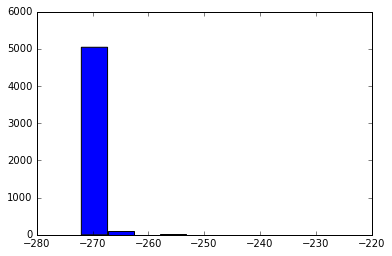

In [99]:
plt.hist(iden_matrix[:,5])

A continuación comparo el perfil de la semana 2013 abril del usuario 5, con la secuencia de la semana de septiembre del 5 y del 1187

In [95]:
users_profiles[5]

{'mls': ['T-18-157-PO-60',
  'E-18-157-PO-90',
  'T-19-12-SN-5',
  'L-19-21-SN-20',
  'SIMON BOLIVAR',
  'LOS HEROES L1',
  'SANTA ISABEL',
  'L-14-10-PO-5',
  'L-19-21-SN-15',
  'LOS HEROES L2',
  'VESPUCIO NORTE',
  'T-3-19-NS-45',
  'T-18-157-PO-40',
  'L-32-3-SN-10'],
 'nvisitas': [1, 2, 1, 1, 6, 8, 1, 1, 1, 2, 1, 1, 1, 1],
 'tpm': array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.5       ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.5       ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        

In [96]:
profiles[5]

{'mls': ['SIMON BOLIVAR',
  'T-18-157-PO-50',
  'T-19-164-PO-5',
  'T-18-157-OP-15',
  'T-18-157-OP-50',
  'LA MONEDA',
  'PLAZA EGANA',
  'T-19-170-SN-40',
  'E-20-53-OP-70',
  'PEDRO DE VALDIVIA',
  'SANTA LUCIA',
  'E-20-53-PO-40',
  'E-20-53-PO-90',
  'T-14-128-OP-60',
  'E-20-53-OP-100',
  'LOS HEROES L1',
  'MANUEL MONTT',
  'SALVADOR'],
 'nvisitas': [7, 1, 1, 1, 1, 7, 1, 1, 1, 5, 3, 1, 1, 1, 1, 2, 1, 2],
 'sequence': ['SIMON BOLIVAR',
  'T-18-157-PO-50',
  'T-19-164-PO-5',
  'T-18-157-OP-15',
  'T-18-157-OP-50',
  'LA MONEDA',
  'PLAZA EGANA',
  'T-19-170-SN-40',
  'E-20-53-OP-70',
  'LA MONEDA',
  'PEDRO DE VALDIVIA',
  'LA MONEDA',
  'SANTA LUCIA',
  'PEDRO DE VALDIVIA',
  'E-20-53-PO-40',
  'E-20-53-PO-90',
  'T-14-128-OP-60',
  'E-20-53-OP-100',
  'LOS HEROES L1',
  'MANUEL MONTT',
  'PEDRO DE VALDIVIA',
  'LOS HEROES L1',
  'PEDRO DE VALDIVIA',
  'LA MONEDA',
  'SIMON BOLIVAR',
  'SALVADOR',
  'LA MONEDA',
  'SIMON BOLIVAR',
  'SALVADOR',
  'SANTA LUCIA',
  'SIMON BOLIVAR',

In [97]:
profiles[1187]

{'mls': ['LA MONEDA',
  'SIMON BOLIVAR',
  'L-18-6-PO-110',
  'L-19-21-SN-15',
  'T-14-127-NS-15',
  'T-14-127-NS-45',
  'T-14-127-NS-4',
  'PEDRO DE VALDIVIA',
  'UNIVERSIDAD DE CHILE'],
 'nvisitas': [8, 9, 1, 1, 2, 1, 1, 1, 2],
 'sequence': ['LA MONEDA',
  'SIMON BOLIVAR',
  'LA MONEDA',
  'L-18-6-PO-110',
  'L-19-21-SN-15',
  'T-14-127-NS-15',
  'T-14-127-NS-45',
  'T-14-127-NS-4',
  'T-14-127-NS-15',
  'LA MONEDA',
  'PEDRO DE VALDIVIA',
  'SIMON BOLIVAR',
  'LA MONEDA',
  'SIMON BOLIVAR',
  'LA MONEDA',
  'UNIVERSIDAD DE CHILE',
  'SIMON BOLIVAR',
  'UNIVERSIDAD DE CHILE',
  'LA MONEDA',
  'SIMON BOLIVAR',
  'LA MONEDA'],
 'user_id': 50264508}

- Uno incorrecto que parece correcto

In [55]:
np.argmax(iden_matrix[:,5167])

1031

In [59]:
iden_matrix[1031,5167]

-0.48455006504028197

In [87]:
users_profiles[1031]

{'mls': ['L-13-31-OP-60',
  'L-13-10-PO-5',
  'DEL SOL',
  'SANTA ANA L5',
  'MONTE TABOR',
  'SANTA ANA L2',
  'T-20-182-PO-36'],
 'nvisitas': [1, 1, 1, 6, 6, 2, 1],
 'tpm': array([[ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.8 ,  0.  ,  0.2 ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.75,  0.  ,  0.25],
        [  nan,   nan,   nan,   nan,   nan,   nan,   nan]]),
 'user_id': 42922612}

In [50]:
up_matrix = np.matrix(users_profiles[5167]["tpm"])
df_up_matrix = pd.DataFrame(up_matrix)
df_up_matrix.columns = users_profiles[5167]["mls"]
df_up_matrix.index = users_profiles[5167]["mls"]
df_up_matrix

,MONTE TABOR,LAS PARCELAS,SANTA ANA L5,E-13-54-NS-85,PLAZA MAIPU,CAL Y CANTO
MONTE TABOR,0.000000,0.25,0.750000,0.0,0.000000,0
LAS PARCELAS,1.000000,0.00,0.000000,0.0,0.000000,0
SANTA ANA L5,0.800000,0.00,0.000000,0.2,0.000000,0
E-13-54-NS-85,0.000000,0.00,0.000000,0.0,1.000000,0
PLAZA MAIPU,0.000000,0.00,0.000000,0.0,0.000000,1
CAL Y CANTO,0.333333,0.00,0.333333,0.0,0.333333,0


In [51]:
profiles[5167]

{'mls': ['SANTA ANA L5', 'MONTE TABOR'],
 'nvisitas': [10, 10],
 'sequence': ['SANTA ANA L5',
  'MONTE TABOR',
  'SANTA ANA L5',
  'MONTE TABOR',
  'SANTA ANA L5',
  'MONTE TABOR',
  'SANTA ANA L5',
  'MONTE TABOR',
  'SANTA ANA L5',
  'MONTE TABOR',
  'SANTA ANA L5'],
 'user_id': 75489580}

In [52]:
profiles[2326]

{'mls': ['SANTA ANA L5', 'VICENTE VALDES'],
 'nvisitas': [10, 10],
 'sequence': ['SANTA ANA L5',
  'VICENTE VALDES',
  'SANTA ANA L5',
  'VICENTE VALDES',
  'SANTA ANA L5',
  'VICENTE VALDES',
  'SANTA ANA L5',
  'VICENTE VALDES',
  'SANTA ANA L5',
  'VICENTE VALDES',
  'SANTA ANA L5'],
 'user_id': 65500308}

- Los más incorrectos

- Usuario 3633

In [53]:
users_profiles[3633]

{'mls': ['RONDIZONNI',
  'LA CISTERNA L2',
  'I-26-228-SN-25',
  'L-23-35-OP-65',
  'LA CISTERNA L4A'],
 'nvisitas': [3, 9, 2, 1, 1],
 'tpm': array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.25      ,  0.        ,  0.25      ,  0.25      ,  0.25      ],
        [ 0.33333333,  0.66666667,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ]]),
 'user_id': 68598836}

In [54]:
profiles[3633]

{'mls': ['LA CISTERNA L2',
  'L-23-35-OP-75',
  'I-26-228-SN-25',
  'L-23-35-OP-65',
  'RONDIZONNI',
  'L-23-35-PO-70',
  'T-26-228-SN-27',
  'L-23-35-PO-80',
  'L-23-42-NS-10',
  'T-26-228-SN-20',
  'T-23-205-SN-72',
  'SANTA ROSA',
  'E-22-205-SN-32'],
 'nvisitas': [12, 2, 10, 1, 12, 2, 1, 4, 2, 1, 2, 1, 1],
 'sequence': ['LA CISTERNA L2',
  'L-23-35-OP-75',
  'I-26-228-SN-25',
  'L-23-35-OP-65',
  'RONDIZONNI',
  'LA CISTERNA L2',
  'RONDIZONNI',
  'L-23-35-PO-70',
  'T-26-228-SN-27',
  'I-26-228-SN-25',
  'L-23-35-PO-80',
  'RONDIZONNI',
  'LA CISTERNA L2',
  'RONDIZONNI',
  'L-23-42-NS-10',
  'I-26-228-SN-25',
  'T-26-228-SN-20',
  'L-23-35-PO-80',
  'RONDIZONNI',
  'LA CISTERNA L2',
  'RONDIZONNI',
  'T-23-205-SN-72',
  'I-26-228-SN-25',
  'L-23-35-PO-70',
  'RONDIZONNI',
  'LA CISTERNA L2',
  'RONDIZONNI',
  'L-23-35-OP-75',
  'I-26-228-SN-25',
  'L-23-35-PO-80',
  'RONDIZONNI',
  'LA CISTERNA L2',
  'RONDIZONNI',
  'L-23-42-NS-10',
  'I-26-228-SN-25',
  'L-23-35-PO-80',
  'ROND

 - Usuario 385

In [55]:
users_profiles[385]

{'mls': ['BELLAVISTA DE LA FLORIDA', 'PLAZA DE ARMAS'],
 'nvisitas': [10, 10],
 'tpm': array([[ 0.,  1.],
        [ 1.,  0.]]),
 'user_id': 19306541}

In [56]:
profiles[385]

{'mls': ['PLAZA DE ARMAS', 'BELLAVISTA DE LA FLORIDA'],
 'nvisitas': [10, 10],
 'sequence': ['PLAZA DE ARMAS',
  'BELLAVISTA DE LA FLORIDA',
  'PLAZA DE ARMAS',
  'BELLAVISTA DE LA FLORIDA',
  'PLAZA DE ARMAS',
  'BELLAVISTA DE LA FLORIDA',
  'PLAZA DE ARMAS',
  'BELLAVISTA DE LA FLORIDA',
  'PLAZA DE ARMAS',
  'BELLAVISTA DE LA FLORIDA',
  'PLAZA DE ARMAS'],
 'user_id': 19306541}

- Usuario 791

In [57]:
users_profiles[791]

{'mls': ['MANUEL MONTT', 'UNIVERSIDAD DE CHILE'],
 'nvisitas': [14, 14],
 'tpm': array([[ 0.,  1.],
        [ 1.,  0.]]),
 'user_id': 24547373}

In [58]:
profiles[791]

{'mls': ['MANUEL MONTT',
  'PEDRO DE VALDIVIA',
  'UNIVERSIDAD DE CHILE',
  'UNIVERSIDAD DE SANTIAGO',
  'LA MONEDA'],
 'nvisitas': [10, 1, 8, 2, 2],
 'sequence': ['MANUEL MONTT',
  'PEDRO DE VALDIVIA',
  'UNIVERSIDAD DE CHILE',
  'MANUEL MONTT',
  'UNIVERSIDAD DE CHILE',
  'MANUEL MONTT',
  'UNIVERSIDAD DE SANTIAGO',
  'UNIVERSIDAD DE CHILE',
  'LA MONEDA',
  'UNIVERSIDAD DE SANTIAGO',
  'MANUEL MONTT',
  'LA MONEDA',
  'UNIVERSIDAD DE CHILE',
  'MANUEL MONTT',
  'UNIVERSIDAD DE CHILE',
  'MANUEL MONTT',
  'UNIVERSIDAD DE CHILE',
  'MANUEL MONTT'],
 'user_id': 24547373}

In [1]:
profiles[791]

NameError: name 'profiles' is not defined